<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

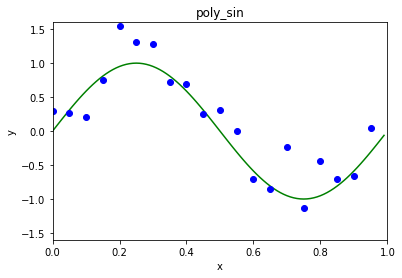

In [28]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 0  1  2  5  6  7  8  9 10 11 12 13 14 15 16 19] [ 3  4 17 18]
[0.   0.05 0.1  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -1.12884052e+00 -4.38871436e-01  5.14518536e-02]
W
 [0.12684207]


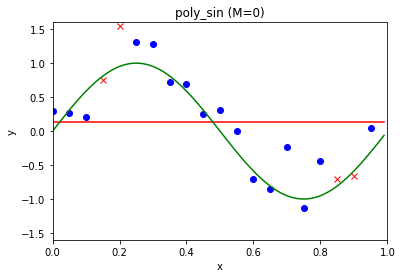

MSE= 0.9262166578758356
[ 0  1  2  3  4  5  7  8 10 11 12 14 15 17 18 19] [ 6  9 13 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.5  0.55 0.6  0.7  0.75 0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  7.27156143e-01  6.87994966e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -2.40579459e-01
 -1.12884052e+00 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [0.16934837]


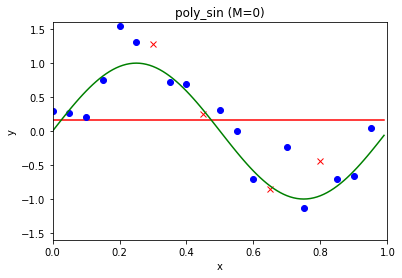

MSE= 0.666339991918187
[ 1  3  4  5  6  7  8  9 11 13 14 15 16 17 18 19] [ 0  2 10 12]
[0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.71308074e-01  7.52486731e-01  1.54185745e+00  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  5.80441429e-05 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [0.1786257]


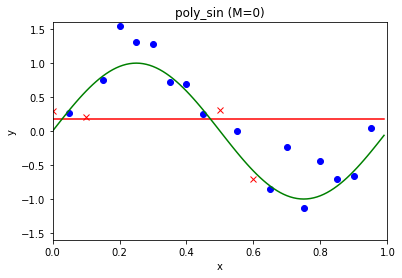

MSE= 0.20321198851002634
[ 0  1  2  3  4  5  6  8  9 10 12 13 15 16 17 18] [ 7 11 14 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.65 0.75 0.8
 0.85 0.9 ]
[ 0.29616338  0.27130807  0.20567358  0.75248673  1.54185745  1.3110506
  1.28753187  0.68799497  0.25023967  0.30478131 -0.70590018 -0.8497448
 -1.12884052 -0.43887144 -0.70439796 -0.66069006]
W
 [0.15129017]


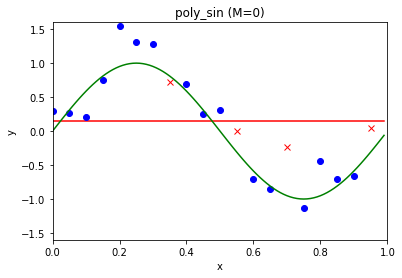

MSE= 0.12950556759834603
[ 0  2  3  4  6  7  9 10 11 12 13 14 16 17 18 19] [ 1  5  8 15]
[0.   0.1  0.15 0.2  0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.28753187e+00  7.27156143e-01  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [0.11357601]


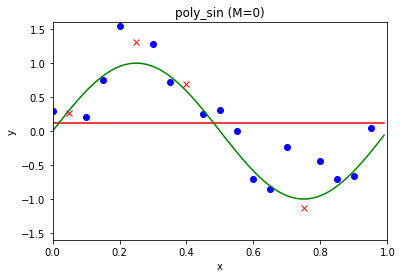

MSE= 0.8330951948819287
CV_MSE[0]=0.551674
[ 0  1  4  7  8  9 10 11 12 13 14 15 16 17 18 19] [2 3 5 6]
[0.   0.05 0.2  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  1.54185745e+00  7.27156143e-01
  6.87994966e-01  2.50239674e-01  3.04781309e-01  5.80441429e-05
 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 0.84542487 -1.62354155]


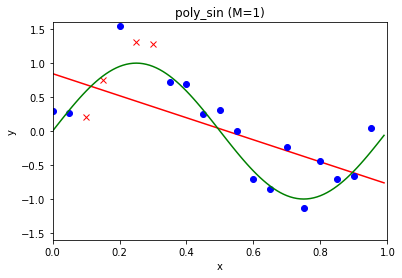

MSE= 0.46836845553816064
[ 0  2  3  4  5  6  8  9 10 12 13 14 15 16 17 18] [ 1  7 11 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.29616338  0.20567358  0.75248673  1.54185745  1.3110506   1.28753187
  0.68799497  0.25023967  0.30478131 -0.70590018 -0.8497448  -0.24057946
 -1.12884052 -0.43887144 -0.70439796 -0.66069006]
W
 [ 1.17544906 -2.22347761]


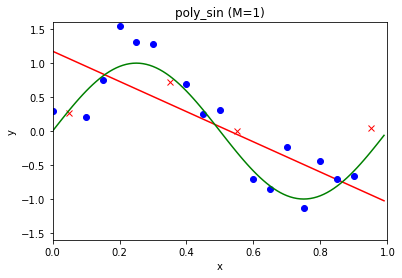

MSE= 0.4291637313304212
[ 0  1  2  3  4  5  6  7  8  9 11 12 14 17 18 19] [10 13 15 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.7  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  1.28753187e+00  7.27156143e-01
  6.87994966e-01  2.50239674e-01  5.80441429e-05 -7.05900175e-01
 -2.40579459e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 0.94392247 -1.47519922]


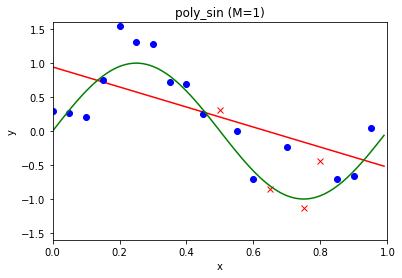

MSE= 0.42037099626580515
[ 1  2  3  4  5  6  7  8 10 11 12 13 15 16 18 19] [ 0  9 14 17]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -1.12884052e+00 -4.38871436e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 1.12955333 -1.96207329]


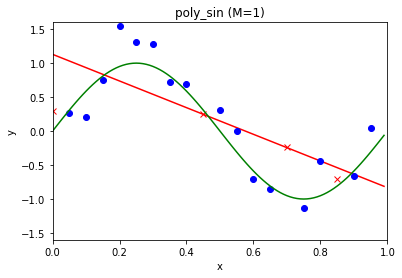

MSE= 0.18054542443113822
[ 0  1  2  3  5  6  7  9 10 11 13 14 15 16 17 19] [ 4  8 12 18]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.31105060e+00  1.28753187e+00  7.27156143e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01  5.14518536e-02]
W
 [ 0.81908532 -1.48782405]


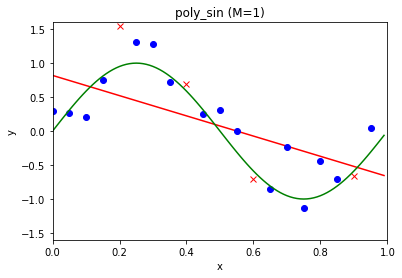

MSE= 0.41900447529454604
CV_MSE[1]=0.383491
[ 0  1  2  3  4  7  8  9 10 11 13 15 16 17 18 19] [ 5  6 12 14]
[0.   0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.55 0.65 0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -8.49744799e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 0.61992533 -0.20393033 -1.36338558]


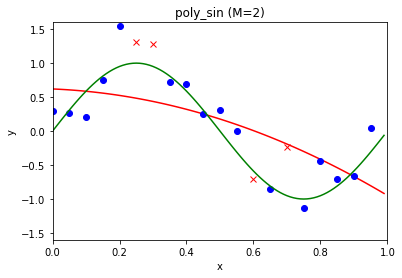

MSE= 0.47995767709634324
[ 0  2  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [1 3 4 8]
[0.   0.1  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.05673579e-01  1.31105060e+00  1.28753187e+00
  7.27156143e-01  2.50239674e-01  3.04781309e-01  5.80441429e-05
 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 0.76820534 -0.87400024 -0.83737837]


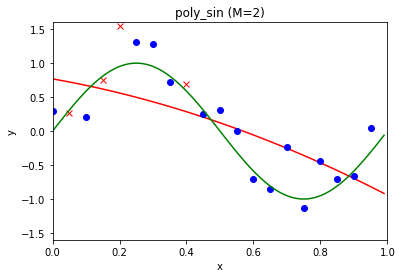

MSE= 0.33710959332653745
[ 1  2  3  4  5  6  8  9 10 11 12 14 16 17 18 19] [ 0  7 13 15]
[0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.8  0.85
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -2.40579459e-01
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 0.88433927 -0.55410705 -1.17239342]


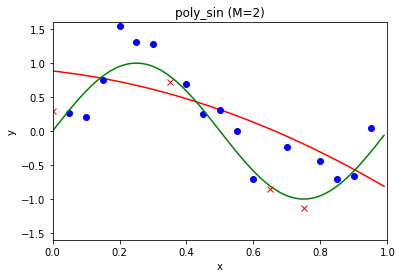

MSE= 0.5076173587933134
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 19] [11 16 17 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7
 0.75 0.95]
[ 0.29616338  0.27130807  0.20567358  0.75248673  1.54185745  1.3110506
  1.28753187  0.72715614  0.68799497  0.25023967  0.30478131 -0.70590018
 -0.8497448  -0.24057946 -1.12884052  0.05145185]
W
 [ 0.74706715 -0.13430249 -1.71105618]


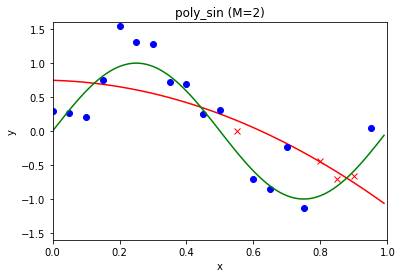

MSE= 0.011125057137802239
[ 0  1  3  4  5  6  7  8 11 12 13 14 15 16 17 18] [ 2  9 10 19]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 2.96163385e-01  2.71308074e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01]
W
 [ 0.73239938  0.92288972 -3.42899795]


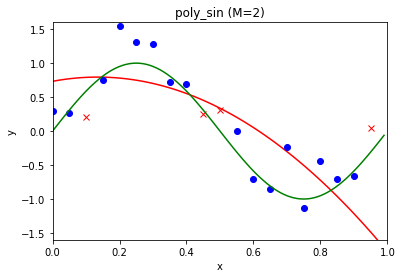

MSE= 0.6866152326242076
CV_MSE[2]=0.404485
[ 1  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19] [ 0  2  7 15]
[0.05 0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 2.71308074e-01  7.52486731e-01  1.54185745e+00  1.31105060e+00
  1.28753187e+00  6.87994966e-01  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ -0.32492937  14.57854068 -40.34971081  26.73057989]


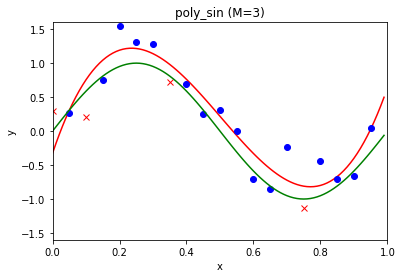

MSE= 0.2135721717067473
[ 0  1  2  3  4  5  6  7  8 10 11 12 14 15 18 19] [ 9 13 16 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.7  0.75
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  1.28753187e+00  7.27156143e-01
  6.87994966e-01  3.04781309e-01  5.80441429e-05 -7.05900175e-01
 -2.40579459e-01 -1.12884052e+00 -6.60690063e-01  5.14518536e-02]
W
 [ -0.11674201  12.4197154  -35.3846663   23.47513749]


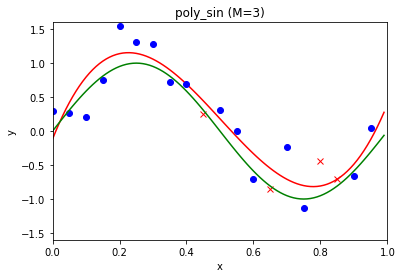

MSE= 0.06651915958498666
[ 0  2  4  6  7  9 10 11 12 13 14 15 16 17 18 19] [1 3 5 8]
[0.   0.1  0.2  0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.05673579e-01  1.54185745e+00  1.28753187e+00
  7.27156143e-01  2.50239674e-01  3.04781309e-01  5.80441429e-05
 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [  0.04705738  11.40920829 -33.99520602  23.02805764]


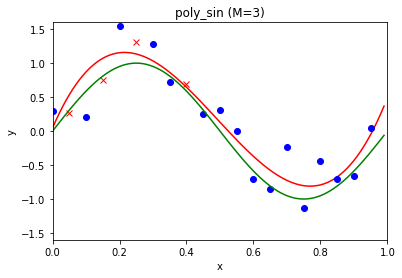

MSE= 0.05109291590059852
[ 0  1  2  3  5  7  8  9 10 11 12 13 14 15 16 17] [ 4  6 18 19]
[0.   0.05 0.1  0.15 0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.31105060e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01]
W
 [ -0.04984937  10.14430875 -29.54352783  19.71609491]


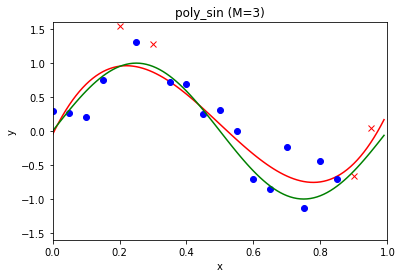

MSE= 0.15120861224539894
[ 0  1  2  3  4  5  6  7  8  9 13 15 16 17 18 19] [10 11 12 14]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.29616338  0.27130807  0.20567358  0.75248673  1.54185745  1.3110506
  1.28753187  0.72715614  0.68799497  0.25023967 -0.8497448  -1.12884052
 -0.43887144 -0.70439796 -0.66069006  0.05145185]
W
 [ -0.11086314  12.64794322 -37.19363733  25.24436492]


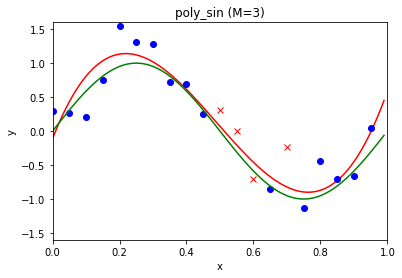

MSE= 0.12446693460759403
CV_MSE[3]=0.121372
[ 0  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19] [ 1  3  7 14]
[0.   0.1  0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.05673579e-01  1.54185745e+00  1.31105060e+00
  1.28753187e+00  6.87994966e-01  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [  0.05787966  10.85220994 -27.78790103   8.23894484   9.47452907]


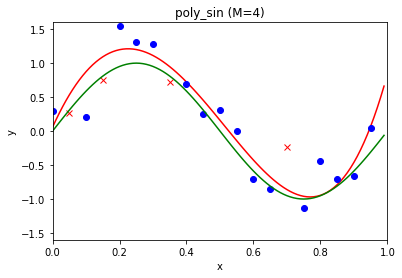

MSE= 0.1543351382041871
[ 0  1  2  3  4  7  8  9 10 12 13 14 15 16 17 18] [ 5  6 11 19]
[0.   0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.29616338  0.27130807  0.20567358  0.75248673  1.54185745  0.72715614
  0.68799497  0.25023967  0.30478131 -0.70590018 -0.8497448  -0.24057946
 -1.12884052 -0.43887144 -0.70439796 -0.66069006]
W
 [  0.03211865   8.74612292 -22.12294919   6.32225456   7.47549601]


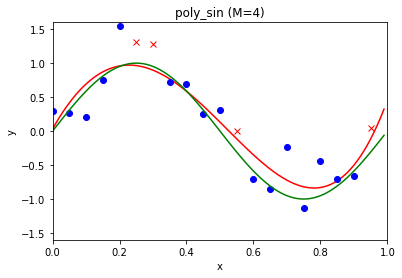

MSE= 0.07863633462041258
[ 0  1  3  4  5  6  7  8 10 11 12 14 15 16 18 19] [ 2  9 13 17]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.7  0.75 0.8
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -6.60690063e-01  5.14518536e-02]
W
 [  0.08113033  10.86071588 -30.08310574  16.06946043   3.61096792]


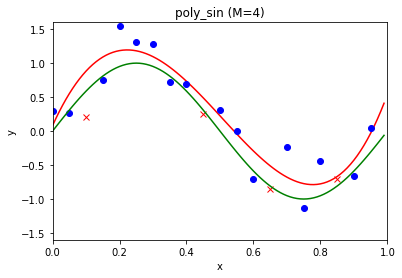

MSE= 0.15774020058330357
[ 1  2  3  5  6  7  8  9 10 11 12 13 14 16 17 19] [ 0  4 15 18]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -4.38871436e-01 -7.04397962e-01  5.14518536e-02]
W
 [ -0.78337385  18.48098054 -55.5201218   50.59204714 -12.26618074]


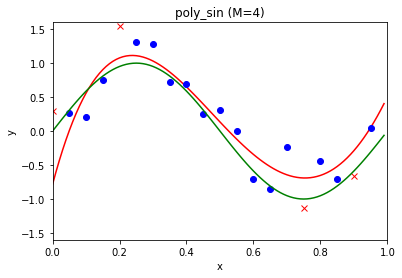

MSE= 0.4281457595096052
[ 0  1  2  3  4  5  6  7  9 11 13 14 15 17 18 19] [ 8 10 12 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.55 0.65 0.7  0.75 0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  1.28753187e+00  7.27156143e-01
  2.50239674e-01  5.80441429e-05 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [  0.03200842   8.30009853 -14.52189307 -11.59649819  18.59576646]


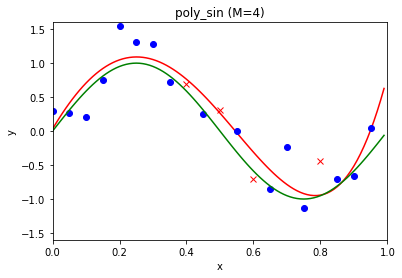

MSE= 0.10426356419056701
CV_MSE[4]=0.184624
[ 0  1  3  5  6  7  9 11 12 13 14 15 16 17 18 19] [ 2  4  8 10]
[0.   0.05 0.15 0.25 0.3  0.35 0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  7.52486731e-01  1.31105060e+00
  1.28753187e+00  7.27156143e-01  2.50239674e-01  5.80441429e-05
 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [   0.20051974    2.94793515   27.63747619 -142.24915969  186.65429474
  -75.13700957]


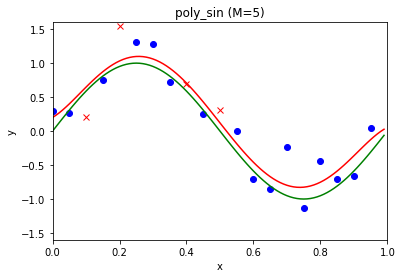

MSE= 0.1222744049422095
[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 17 19] [ 0  5 16 18]
[0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -1.12884052e+00 -7.04397962e-01  5.14518536e-02]
W
 [ -0.56012672  14.05257808 -25.73156353 -25.83076634  67.92483575
 -29.36656756]


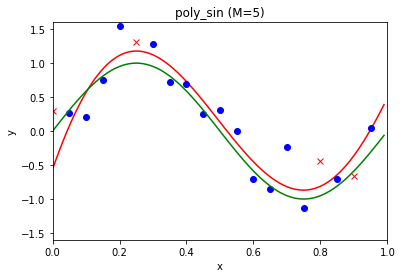

MSE= 0.24505929417062278
[ 0  1  2  3  4  5  7  8  9 10 11 13 16 17 18 19] [ 6 12 14 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.65 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  7.27156143e-01  6.87994966e-01
  2.50239674e-01  3.04781309e-01  5.80441429e-05 -8.49744799e-01
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 1.64969550e-01  1.48165039e+00  4.29700024e+01 -1.87072696e+02
  2.37825530e+02 -9.53717148e+01]


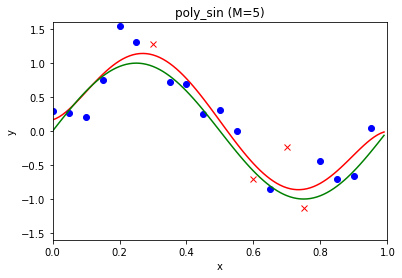

MSE= 0.1269183484974474
[ 0  1  2  4  5  6  7  8  9 10 12 14 15 16 18 19] [ 3 11 13 17]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.7  0.75 0.8
 0.9  0.95]
[ 0.29616338  0.27130807  0.20567358  1.54185745  1.3110506   1.28753187
  0.72715614  0.68799497  0.25023967  0.30478131 -0.70590018 -0.24057946
 -1.12884052 -0.43887144 -0.66069006  0.05145185]
W
 [ 1.39887688e-01  2.63412953e+00  3.92915271e+01 -1.88655693e+02
  2.51138718e+02 -1.04764465e+02]


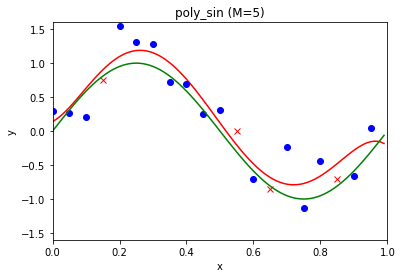

MSE= 0.035672295783701055
[ 0  2  3  4  5  6  8 10 11 12 13 14 15 16 17 18] [ 1  7  9 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 2.96163385e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  6.87994966e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01]
W
 [ 2.34213583e-01 -5.39570456e+00  1.11582333e+02 -4.07376744e+02
  5.23351113e+02 -2.25024941e+02]


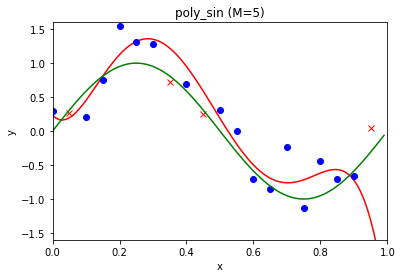

MSE= 0.5543646982344594
CV_MSE[5]=0.216858
[ 0  1  2  4  5  6  9 10 11 13 14 15 16 17 18 19] [ 3  7  8 12]
[0.   0.05 0.1  0.2  0.25 0.3  0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 3.16688689e-01 -1.23354901e+01  2.16216819e+02 -9.54848920e+02
  1.77925358e+03 -1.52860619e+03  5.01356826e+02]


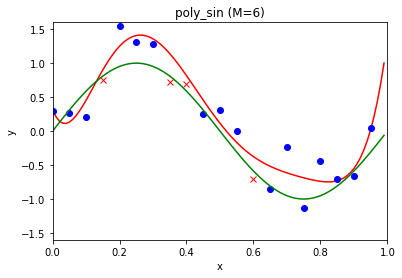

MSE= 0.07928371863230861
[ 1  2  3  4  6  7  8  9 10 11 12 14 15 16 18 19] [ 0  5 13 17]
[0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 6.00112256e-01 -1.94965912e+01  2.74635055e+02 -1.18700058e+03
  2.23859507e+03 -1.95984109e+03  6.54282079e+02]


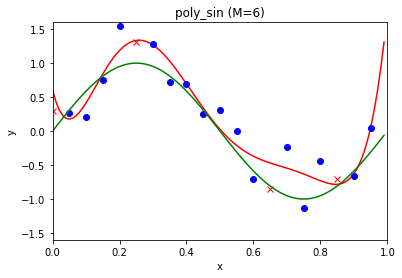

MSE= 0.0609641956653799
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 17 18 19] [ 6 14 15 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  7.27156143e-01  6.87994966e-01
  2.50239674e-01  3.04781309e-01  5.80441429e-05 -7.05900175e-01
 -8.49744799e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 2.96656637e-01 -9.97873789e+00  1.81623908e+02 -7.98544732e+02
  1.46573590e+03 -1.24100393e+03  4.03177473e+02]


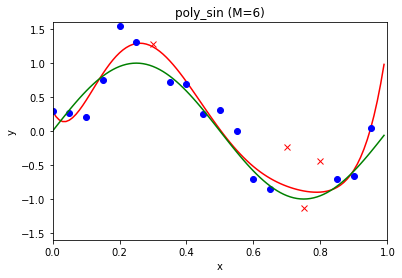

MSE= 0.15042545399939433
[ 0  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18] [ 1  9 11 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.29616338  0.20567358  0.75248673  1.54185745  1.3110506   1.28753187
  0.72715614  0.68799497  0.30478131 -0.70590018 -0.8497448  -0.24057946
 -1.12884052 -0.43887144 -0.70439796 -0.66069006]
W
 [ 2.67994139e-01 -1.44501413e+01  2.37720575e+02 -1.03078509e+03
  1.88460211e+03 -1.57745897e+03  5.00476164e+02]


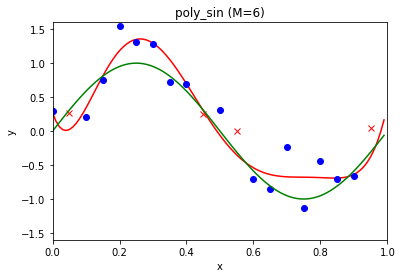

MSE= 0.09295400402595103
[ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 19] [ 2  4 10 18]
[0.   0.05 0.15 0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 2.96163385e-01  2.71308074e-01  7.52486731e-01  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01  5.14518536e-02]
W
 [ 3.14011550e-01 -8.27853236e+00  1.60480515e+02 -7.17349691e+02
  1.31939229e+03 -1.10922960e+03  3.55667336e+02]


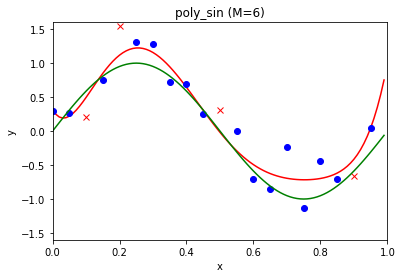

MSE= 0.10705089117033426
CV_MSE[6]=0.098136
[ 1  2  3  4  5  7  8  9 10 11 12 13 15 16 18 19] [ 0  6 14 17]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -1.12884052e+00 -4.38871436e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 1.18693806e+00 -3.91100073e+01  4.94647826e+02 -2.34754976e+03
  5.47896402e+03 -6.86756268e+03  4.44385505e+03 -1.16428185e+03]


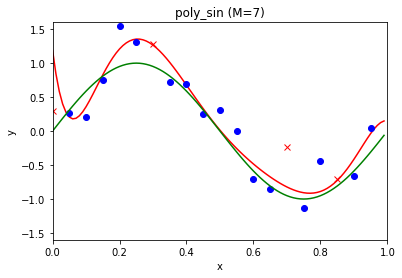

MSE= 0.28335128111592345
[ 0  1  2  3  4  5  6 10 11 12 14 15 16 17 18 19] [ 7  8  9 13]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  1.28753187e+00  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 3.19757722e-01 -1.02419794e+01  1.59331023e+02 -5.37846242e+02
  4.71369049e+02  4.92206410e+02 -1.02064463e+03  4.47130695e+02]


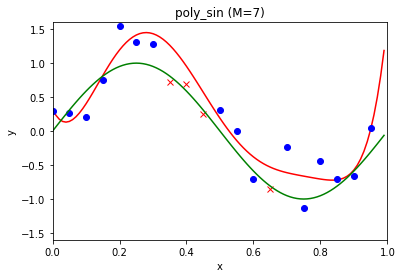

MSE= 0.14068651014308411
[ 0  2  3  4  5  6  7  8  9 10 11 13 14 15 17 19] [ 1 12 16 18]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75
 0.85 0.95]
[ 2.96163385e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  2.50239674e-01  3.04781309e-01  5.80441429e-05 -8.49744799e-01
 -2.40579459e-01 -1.12884052e+00 -7.04397962e-01  5.14518536e-02]
W
 [ 2.96307980e-01 -3.82757119e+01  6.45978894e+02 -3.58633803e+03
  9.52353821e+03 -1.33062613e+04  9.41769012e+03 -2.65739822e+03]


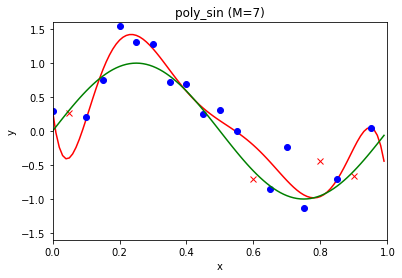

MSE= 0.2840785780257865
[ 0  1  2  5  6  7  8  9 11 12 13 14 15 16 17 18] [ 3  4 10 19]
[0.   0.05 0.1  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01]
W
 [ 3.38547585e-01 -1.35875569e+01  2.26536784e+02 -1.06285316e+03
  2.27383043e+03 -2.56564088e+03  1.51307771e+03 -3.73069774e+02]


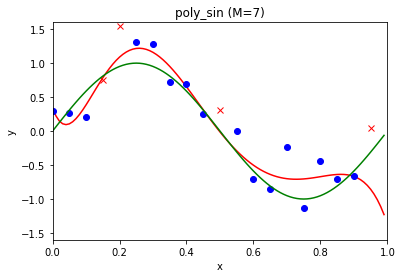

MSE= 0.282636080234043
[ 0  1  3  4  6  7  8  9 10 12 13 14 16 17 18 19] [ 2  5 11 15]
[0.   0.05 0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.29616338  0.27130807  0.75248673  1.54185745  1.28753187  0.72715614
  0.68799497  0.25023967  0.30478131 -0.70590018 -0.8497448  -0.24057946
 -0.43887144 -0.70439796 -0.66069006  0.05145185]
W
 [ 2.85792824e-01 -4.49044185e+00  1.00373223e+02 -2.64745900e+02
 -3.15874012e+02  1.82178292e+03 -2.16464741e+03  8.29453697e+02]


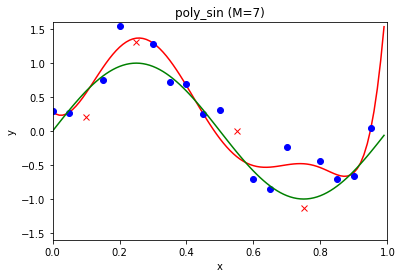

MSE= 0.17261194179759476
CV_MSE[7]=0.232673
[ 0  1  2  4  5  6  7 10 11 12 13 14 15 16 17 19] [ 3  8  9 18]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01  5.14518536e-02]
W
 [ 3.50945362e-01 -2.51747923e+01  5.20167003e+02 -3.47546071e+03
  1.18214669e+04 -2.31495225e+04  2.62929043e+04 -1.60448405e+04
  4.06219626e+03]


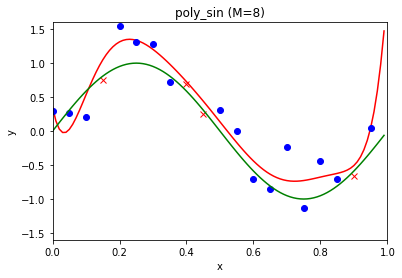

MSE= 0.0373158366503012
[ 0  1  2  3  4  5  6  7  8  9 10 12 15 16 18 19] [11 13 14 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.75 0.8
 0.9  0.95]
[ 0.29616338  0.27130807  0.20567358  0.75248673  1.54185745  1.3110506
  1.28753187  0.72715614  0.68799497  0.25023967  0.30478131 -0.70590018
 -1.12884052 -0.43887144 -0.66069006  0.05145185]
W
 [ 3.62696331e-01 -2.49321202e+01  4.93997198e+02 -3.27354082e+03
  1.12583456e+04 -2.25717482e+04  2.63599411e+04 -1.65203844e+04
  4.28020436e+03]


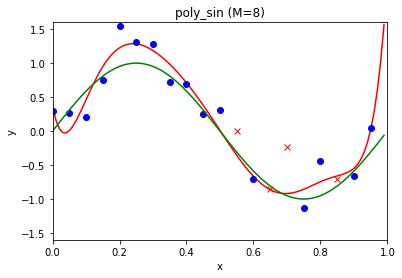

MSE= 0.1472567551534554
[ 1  2  3  4  7  8  9 10 11 13 14 15 16 17 18 19] [ 0  5  6 12]
[0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  7.27156143e-01  6.87994966e-01  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -8.49744799e-01 -2.40579459e-01 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 5.12100192e+00 -1.86846399e+02  2.41134904e+03 -1.42409272e+04
  4.57529105e+04 -8.54314393e+04  9.25713515e+04 -5.39614729e+04
  1.30837878e+04]


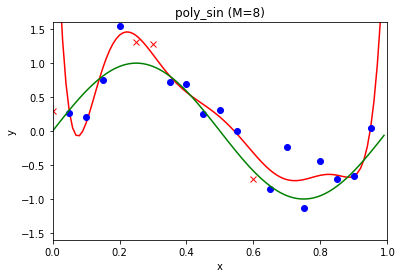

MSE= 5.865259834110141
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 17 18 19] [ 4  7 15 16]
[0.   0.05 0.1  0.15 0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.85
 0.9  0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.31105060e+00  1.28753187e+00  6.87994966e-01  2.50239674e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 3.25701075e-01 -1.04460365e+01  1.72639891e+02 -8.25908298e+02
  2.29260574e+03 -4.82956608e+03  6.98984122e+03 -5.57160110e+03
  1.78517811e+03]


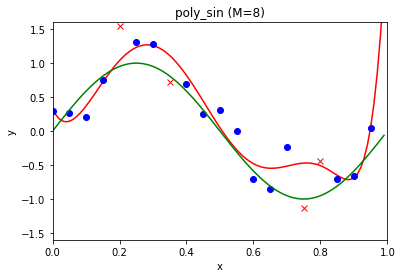

MSE= 0.20977491355907207
[ 0  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18] [ 1  2 10 19]
[0.   0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 2.96163385e-01  7.52486731e-01  1.54185745e+00  1.31105060e+00
  1.28753187e+00  7.27156143e-01  6.87994966e-01  2.50239674e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01]
W
 [ 2.95632252e-01 -1.12524748e+02  1.97445949e+03 -1.30761609e+04
  4.48810482e+04 -8.79875514e+04  9.93105483e+04 -6.00307520e+04
  1.50479877e+04]


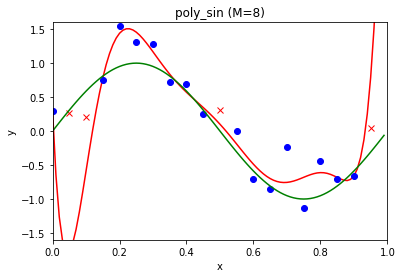

MSE= 1.348452264334252
CV_MSE[8]=1.521612
[ 0  1  2  3  4  6  7  8 10 11 12 13 14 16 17 19] [ 5  9 15 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.95]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  3.04781309e-01  5.80441429e-05 -7.05900175e-01 -8.49744799e-01
 -2.40579459e-01 -4.38871436e-01 -7.04397962e-01  5.14518536e-02]
W
 [ 3.13312110e-01  9.98860336e+00 -5.45263769e+02  8.15389329e+03
 -5.15713258e+04  1.72311323e+05 -3.30451661e+05  3.65828740e+05
 -2.17367043e+05  5.36479390e+04]


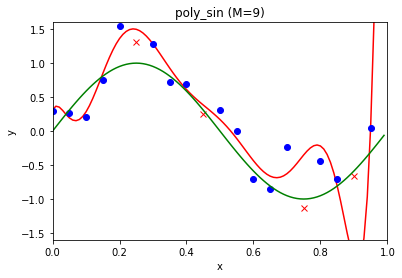

MSE= 0.5416279935070409
[ 0  2  4  5  6  7  9 10 11 12 13 14 15 16 18 19] [ 1  3  8 17]
[0.   0.1  0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 2.96163385e-01  2.05673579e-01  1.54185745e+00  1.31105060e+00
  1.28753187e+00  7.27156143e-01  2.50239674e-01  3.04781309e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 2.96281715e-01 -6.70988202e+01  1.28973183e+03 -8.75644924e+03
  2.98792043e+04 -5.65782766e+04  5.88687634e+04 -2.90148753e+04
  2.27174561e+03  2.11117136e+03]


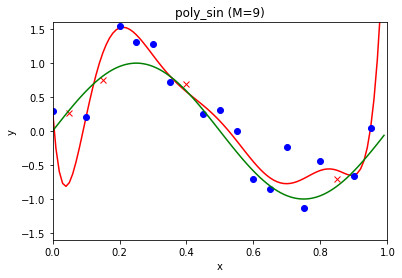

MSE= 0.3116842156201808
[ 0  1  3  5  6  7  8  9 10 12 13 14 15 17 18 19] [ 2  4 11 16]
[0.   0.05 0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.29616338  0.27130807  0.75248673  1.3110506   1.28753187  0.72715614
  0.68799497  0.25023967  0.30478131 -0.70590018 -0.8497448  -0.24057946
 -1.12884052 -0.70439796 -0.66069006  0.05145185]
W
 [ 3.01198199e-01 -5.17544035e-01 -7.14508754e+01  1.77257491e+03
 -1.20158011e+04  3.92401894e+04 -7.17710849e+04  7.54610551e+04
 -4.27038415e+04  1.00916780e+04]


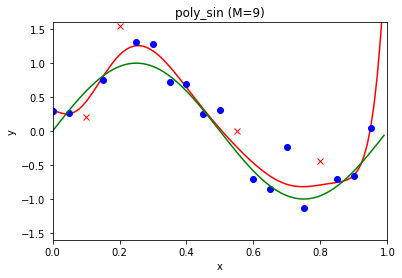

MSE= 0.10226449308299637
[ 0  1  2  3  4  5  8  9 11 12 13 14 15 16 17 18] [ 6  7 10 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 2.96163385e-01  2.71308074e-01  2.05673579e-01  7.52486731e-01
  1.54185745e+00  1.31105060e+00  6.87994966e-01  2.50239674e-01
  5.80441429e-05 -7.05900175e-01 -8.49744799e-01 -2.40579459e-01
 -1.12884052e+00 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01]
W
 [ 3.07868491e-01  8.15530718e+00 -4.41382932e+02  6.49638438e+03
 -3.98875715e+04  1.28997996e+05 -2.39830403e+05  2.58263156e+05
 -1.49868664e+05  3.62767261e+04]


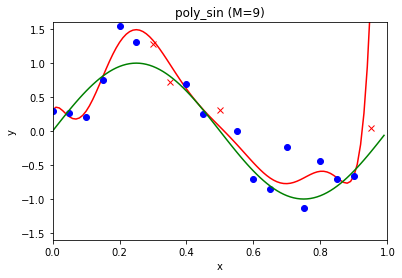

MSE= 0.904761114702904
[ 1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19] [ 0 12 13 14]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.75 0.8  0.85
 0.9  0.95]
[ 2.71308074e-01  2.05673579e-01  7.52486731e-01  1.54185745e+00
  1.31105060e+00  1.28753187e+00  7.27156143e-01  6.87994966e-01
  2.50239674e-01  3.04781309e-01  5.80441429e-05 -1.12884052e+00
 -4.38871436e-01 -7.04397962e-01 -6.60690063e-01  5.14518536e-02]
W
 [ 2.48428654e+00 -7.24779130e+01  5.97177161e+02  1.24928730e+02
 -1.87896640e+04  8.91371713e+04 -1.96469573e+05  2.32132495e+05
 -1.42067801e+05  3.54131486e+04]


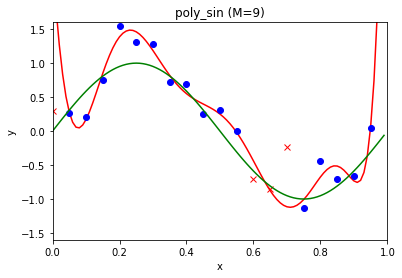

MSE= 1.4057642347152548
CV_MSE[9]=0.653220


In [29]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))





CV_MSE
 [0.55167388 0.38349062 0.40448498 0.12137196 0.1846242  0.21685781
 0.09813565 0.23267288 1.52161192 0.65322041]
The best order of the model is 7


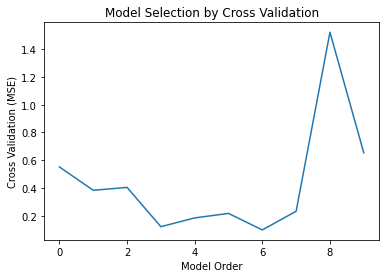

In [30]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.show()
plt.close()
